In [51]:
import pandas as pd

In [52]:
path="D:\\Machine Learning_Tasks\\Tennis_Play_prediction\\play_tennis.csv"

In [53]:
df=pd.read_csv(path)

In [54]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [55]:
df.isna().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
df_encoded=df.copy()

In [58]:
label_encoders={}
for column in df_encoded.columns:
    le = LabelEncoder()  # NEW instance each time!
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

In [59]:
print(df_encoded)

    day  outlook  temp  humidity  wind  play
0     0        2     1         0     1     0
1     6        2     1         0     0     0
2     7        0     1         0     1     1
3     8        1     2         0     1     1
4     9        1     0         1     1     1
5    10        1     0         1     0     0
6    11        0     0         1     0     1
7    12        2     2         0     1     0
8    13        2     0         1     1     1
9     1        1     2         1     1     1
10    2        2     2         1     0     1
11    3        0     2         0     0     1
12    4        0     1         1     1     1
13    5        1     2         0     0     0


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
X=df_encoded.drop(columns=['day','play'], axis=1)
y=df_encoded['play']

## Training MOdel

In [62]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


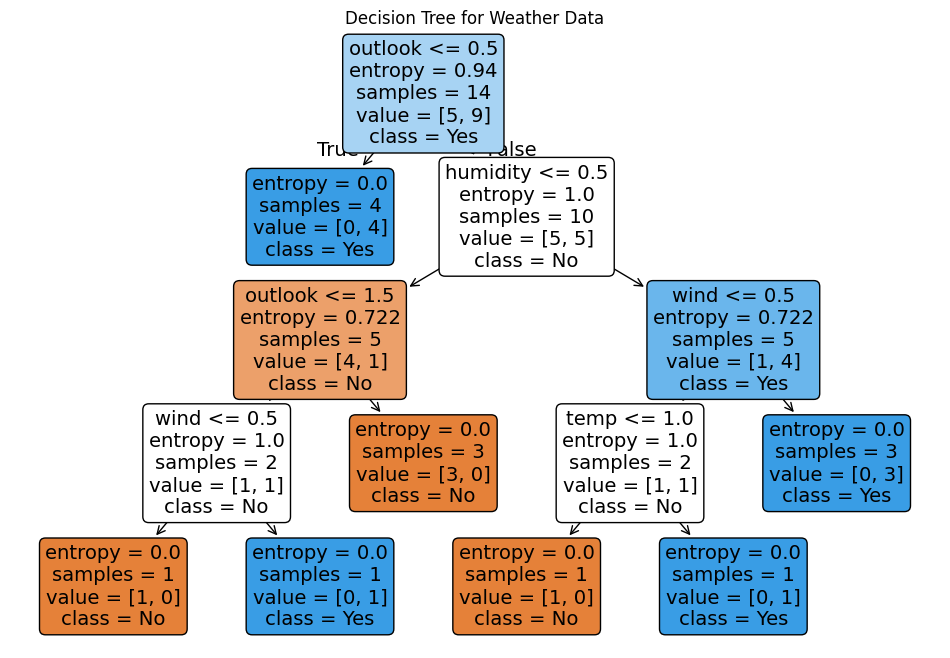

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],  # <-- manually written class names
          filled=True,
          rounded=True)
plt.title("Decision Tree for Weather Data")
plt.show()


## Model Evaluation

In [64]:
y_pred=model.predict(X)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score=accuracy_score(y,y_pred)
classification_report=classification_report(y,y_pred)

In [65]:
print(accuracy_score)

1.0


In [66]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

